### Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

### Data Exploration

In [2]:
# loading the data set
df = pd.read_csv("segmentation data.csv")
df.shape
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
# Checking info about the dataset
df.info()

# cross-checking null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [4]:
# described data
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
# dropping the ID column
df_1 = df.drop("ID", axis=1)
df_1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


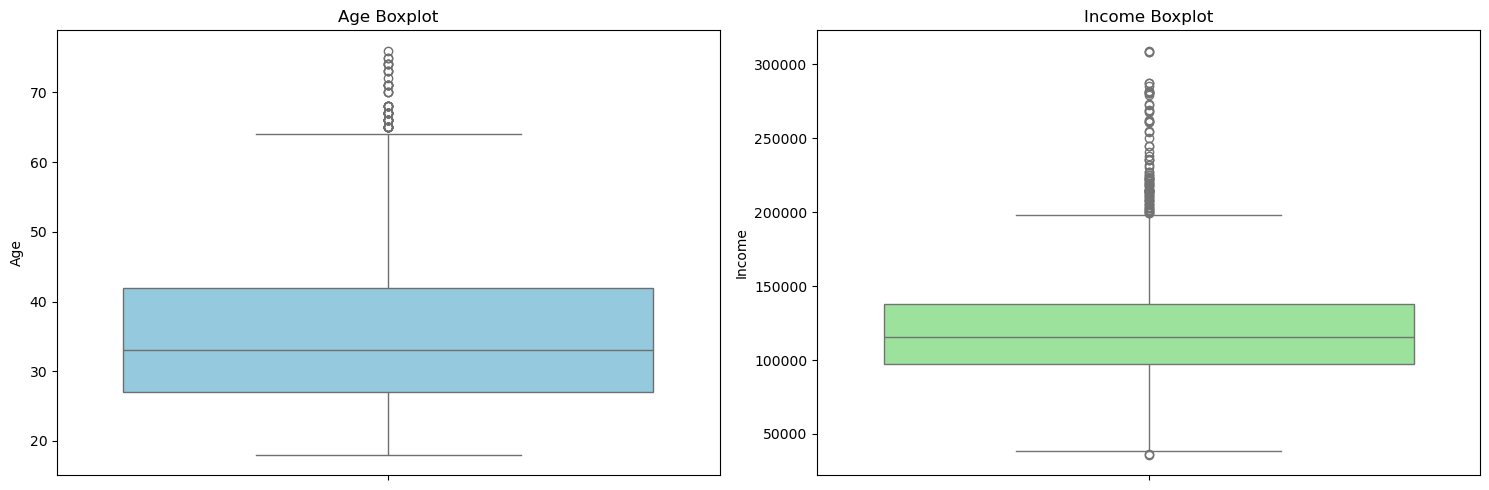

In [6]:
# checking for outliers for the numerical columns

# Age column
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_1['Age'], color='skyblue')
plt.title('Age Boxplot')


plt.subplot(1, 2, 2)
sns.boxplot(data=df_1['Income'], color='lightgreen')
plt.title('Income Boxplot')

plt.tight_layout()
plt.show()

In [7]:
# Selecting the numerical columns
numerical_cols = ['Age', 'Income']
df_filtered = df_1.copy()

print(f"Original number of rows: {df_filtered.shape[0]}")

for col in numerical_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering out the outliers
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    print(f"Number of rows after filtering '{col}': {df_filtered.shape[0]}")
    

print(f"Number of rows removed: {df_1.shape[0] - df_filtered.shape[0]}")  

Original number of rows: 2000
Number of rows after filtering 'Age': 1943
Number of rows after filtering 'Income': 1868
Number of rows removed: 132


In [8]:
# Scaling the filtered data for K-Means.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

In [9]:
# Determining the Optimal Number of Clusters (The Elbow Method)
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', max_iter=1000)

    cluster_labels = kmeans.fit_predict(df_scaled)

    sil_score = silhouette_score(df_scaled, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

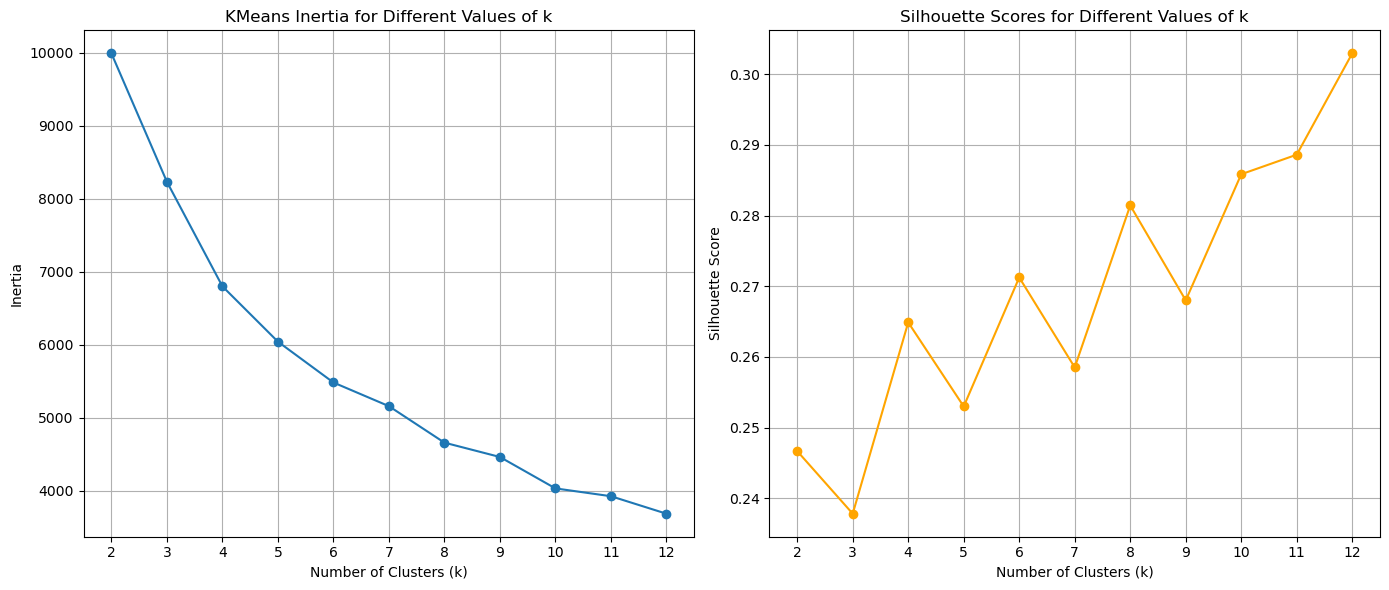

In [10]:
# Elbow and Silhouette Plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# selecting the optimal number of clusters using the elbow method
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, max_iter=1000)
kmeans_model.fit(df_scaled)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [12]:
df_filtered['Cluster'] = kmeans_model.labels_
df_filtered.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1
5,0,0,35,1,144848,0,0,3


In [13]:
# mapping actual values to encoded columns
sex_dict = {0: 'Male', 1: 'Female'}
marital_status_dict = {0: 'Single', 1: 'Married'}
occupation_dict = {0: 'Unemployed/Unskilled', 1: 'Skilled Employee/Official', 2: "management / self-employed / highly qualified employee / officer"}
education_dict = {0: "other/unknown", 1: "High School", 2: "University", 3: "Graduate School"}
settlement_dict = {0: "Small City", 1: "Mid-sized city", 2: "Big city"}


df_filtered['Sex'] = df_filtered['Sex'].map(sex_dict)
df_filtered['Marital status'] = df_filtered['Marital status'].map(marital_status_dict)
df_filtered['Occupation'] = df_filtered['Occupation'].map(occupation_dict)
df_filtered['Education'] = df_filtered['Education'].map(education_dict)
df_filtered['Settlement size'] = df_filtered['Settlement size'].map(settlement_dict)

In [25]:
df_filtered
# df_filtered.to_csv("df_filtered.csv")

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1,Female,Married,22,High School,150773,Skilled Employee/Official,Big city,0
2,Male,Single,49,High School,89210,Unemployed/Unskilled,Small City,3
3,Male,Single,45,High School,171565,Skilled Employee/Official,Mid-sized city,1
4,Male,Single,53,High School,149031,Skilled Employee/Official,Mid-sized city,1
5,Male,Single,35,High School,144848,Unemployed/Unskilled,Small City,3
...,...,...,...,...,...,...,...,...
1995,Female,Single,47,High School,123525,Unemployed/Unskilled,Small City,3
1996,Female,Married,27,High School,117744,Skilled Employee/Official,Small City,0
1997,Male,Single,31,other/unknown,86400,Unemployed/Unskilled,Small City,3
1998,Female,Married,24,High School,97968,Unemployed/Unskilled,Small City,3


In [15]:
# Average Silhouette Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(df_scaled, df_filtered['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

davies_bouldin_idx = davies_bouldin_score(df_scaled, df_filtered['Cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_idx:.4f}")

Silhouette Score: 0.2649
Davies-Bouldin Index: 1.3054


In [16]:
# differentiating the categorical and numerical columns
cat_cols = df_filtered.columns.drop(["Age", "Income"])
num_cols = ["Age", "Income", "Cluster"]

In [17]:
# getting the mean for the numerical features for each cluster
numerical_profiles = df_filtered[num_cols].groupby('Cluster').mean()
print("Cluster Profiles (Mean of each feature per cluster):")
numerical_profiles

Cluster Profiles (Mean of each feature per cluster):


,Age,Income
Cluster,,
0,27.866920,119461.781369
1,36.802513,132206.780969
2,51.650000,132411.850000
3,31.833028,87572.223853


In [18]:
# getting the mode of categorical features for each cluster
def get_mode(x):
    return x.mode()[0]

categorical_profiles = df_filtered[cat_cols].groupby('Cluster')[cat_cols.drop("Cluster")].agg(get_mode)
print("Cluster Profiles (Mean of each feature per cluster):")
categorical_profiles

Cluster Profiles (Mean of each feature per cluster):


,Sex,Marital status,Education,Occupation,Settlement size
Cluster,,,,,
0,Female,Married,High School,Skilled Employee/Official,Small City
1,Male,Single,High School,Skilled Employee/Official,Big city
2,Female,Married,University,Skilled Employee/Official,Small City
3,Female,Single,High School,Unemployed/Unskilled,Small City


In [19]:
# combine clustering features
combined_summary = pd.concat([numerical_profiles, categorical_profiles], axis=1)
combined_summary

,Age,Income,Sex,Marital status,Education,Occupation,Settlement size
Cluster,,,,,,,
0,27.866920,119461.781369,Female,Married,High School,Skilled Employee/Official,Small City
1,36.802513,132206.780969,Male,Single,High School,Skilled Employee/Official,Big city
2,51.650000,132411.850000,Female,Married,University,Skilled Employee/Official,Small City
3,31.833028,87572.223853,Female,Single,High School,Unemployed/Unskilled,Small City


In [20]:
# 3d Scatter plots of customer data
# Number 1 Age vs Income vs Sex
fig = px.scatter_3d(df_filtered, x='Age', y='Income', z='Sex', color='Cluster')
fig.update_layout(
    title='Customer Segmentation by Age, Income & Sex',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Income',
        zaxis_title='Sex'
    )
)
fig.show()


In [21]:
# Number 2 Age vs Income vs Marital Status
fig = px.scatter_3d(df_filtered, x='Age', y='Income', z='Marital status', color='Cluster')
fig.update_layout(
    title='Customer Segmentation by Age, Income & Marital Status',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Income',
        zaxis_title='Marital Status'
    )
)
fig.show()

In [22]:
# Number 3 Age vs Income vs Occupation
fig = px.scatter_3d(df_filtered, x='Age', y='Income', z='Occupation', color='Cluster')
fig.update_layout(
    title='Customer Segmentation by Age, Income & Occupation',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Income',
        zaxis_title='Occupation'
    )
)
fig.show()

In [23]:
# Number 4 Age vs Income vs Education
fig = px.scatter_3d(df_filtered, x='Age', y='Income', z='Education', color='Cluster')
fig.update_layout(
    title='Customer Segmentation by Age, Income & Education',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Income',
        zaxis_title='Education'
    )
)
fig.show()

In [24]:
# Number 5 Age vs Income vs Settlement Size
fig = px.scatter_3d(df_filtered, x='Age', y='Income', z='Settlement size', color='Cluster')
fig.update_layout(
    title='Customer Segmentation by Age, Income & Settlement Size',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Income',
        zaxis_title='Settlement Size'
    )
)
fig.show()